# Home task : KNN classification
1. `iris` dataset
    - load `iris` dataset
    - split to train and test
    - train KNN classifiers for different `K`
    - choose the best `K` determined on test set

2. synthetic dataset
    - generrate synthetic dataset
    - split to train and test
    - train KNN regressors for different `K`
    - choose the best `K` determined on test set
    - visualize the decision boundary 




## `Iris` dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from mlxtend.plotting import plot_decision_regions

In [2]:
iris = load_iris()
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']
df_iris = pd.DataFrame(X, columns=feature_names) 
df_iris['label'] = y
features_dict = {k: v for k, v in  enumerate(labels)}
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])

X_train, X_test, y_train, y_test = train_test_split(df_iris[feature_names], df_iris['label'], test_size=0.2, random_state=0)

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
k_list = list(range(1, 20))
test_scores = []
training_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    test_scores.append(knn.score(X_test, y_test))
    training_scores.append(knn.score(X_train, y_train))

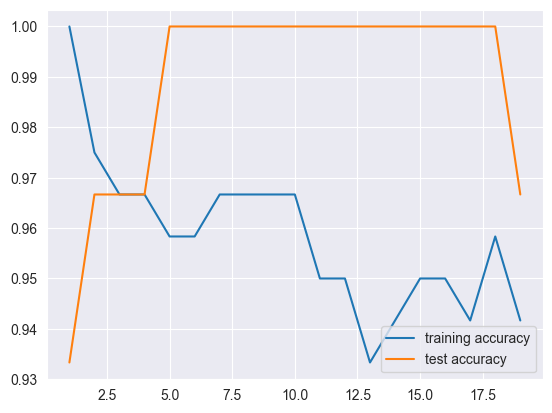

In [5]:
plt.figure()
plt.plot(k_list, training_scores, label="training accuracy")
plt.plot(k_list, test_scores, label="test accuracy")
plt.legend()
plt.show()

In [6]:
score_best = max(test_scores)
k_best = k_list[test_scores.index(score_best)]
print (f'The best k = {k_best}, score = {score_best}')

The best k = 5, score = 1.0


## Synthetic dataset  

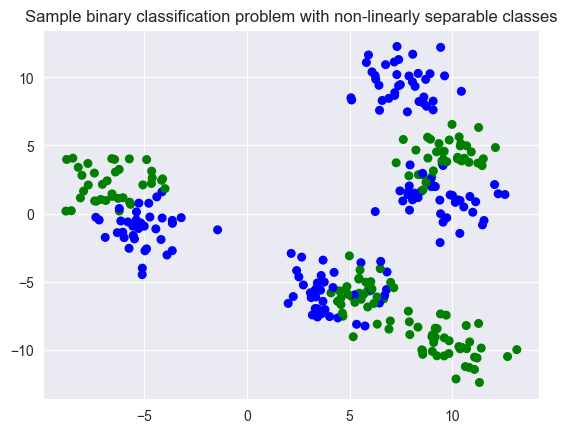

In [7]:

cmap_bold = ListedColormap(['blue','#FFFF00','black','green'])

np.random.seed= 2021
X_D2, y_D2 = make_blobs(n_samples=300, n_features=2, centers=8,
                       cluster_std=1.3, random_state=4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker='o', s=30, cmap=cmap_bold)
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state=0)

In [9]:
def normalize(X_train, X_test):
    scaler= MinMaxScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)

In [10]:
def show_decision_boundaries(X, y, clf, k):
    plt.figure()
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title('Knn with K='+ str(k))
    plt.show()

In [11]:
training_scores = []
test_scores = []
models = []

k_list = list(range(1, 20))

for n_neighbors in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn_model.fit(X_train_scaled, y_train)
    training_scores.append(knn_model.score(X_train_scaled, y_train))
    test_scores.append(knn_model.score(X_test_scaled, y_test))
    models.append(knn_model)

score_best = max(test_scores)
index_best = test_scores.index(score_best)
k_best = k_list[index_best]
model_best = models[index_best]

In [12]:
print (f'The best k = {k_best} , score = {score_best}')

The best k = 18 , score = 0.9466666666666667


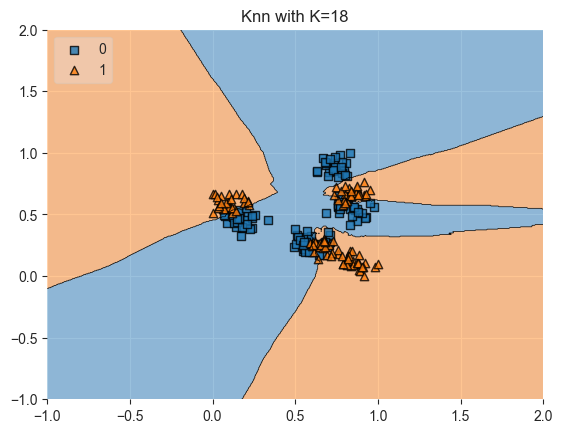

In [13]:
show_decision_boundaries(X_train_scaled, y_train, model_best, k_best)